# SGD（随机梯度下降）

## 加载训练数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3 + np.random.normal(0, 3, size=m)

In [3]:
x[:20]

array([ 0.62027664, -0.27083048,  0.99994449,  0.73826316, -0.50719554,
       -0.12608066,  1.80651869, -2.05598133,  2.11552938,  0.04267722,
        0.96650211,  2.33810107,  0.99256819, -0.02935778,  0.13946469,
       -1.07359731,  0.84146241, -0.65870403,  1.67369196,  0.73506173])

In [4]:
y[:20]

array([ 5.40199445,  0.3878627 ,  5.48853306,  8.76491445,  1.19593655,
        6.45768346,  6.8546047 , -5.32609715, 12.19668165, -1.07206523,
       10.86970002, 16.15500107,  6.80812354,  4.51326574,  5.07159656,
       -0.09328169,  9.90746192, -1.80316136,  8.89530118,  6.26383535])

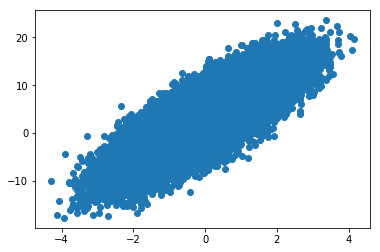

In [5]:
plt.scatter(x, y)
plt.show()

## 我们复用我们上一节的代码

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    
    return res * 2 / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

## 计算一下运行这个梯度下降的时间

In [7]:
X_b = np.hstack([np.ones((len(X), 1)), X])
X_b[:5]

array([[ 1.        ,  0.62027664],
       [ 1.        , -0.27083048],
       [ 1.        ,  0.99994449],
       [ 1.        ,  0.73826316],
       [ 1.        , -0.50719554]])

In [8]:
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
initial_theta

array([0., 0.])

In [9]:
%%time
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 1.7 s


In [10]:
theta

array([2.99840028, 4.01723475])

## 随机梯度下降法

In [11]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):
    # 此处是为了让学习率越来越小，避免直接跳过最优解
    # 这是由于SGD本身的特性决定的
    # t0和t1是两个超参数，可自行调节
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        # 随机取一个数据
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        # 我们选用的是当前步数的倒数作为学习率，这样就实现了学习率越来越小
        # 但是为了防止一开始学习率过大，我们分子和分母各增加参数进行调节
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [12]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

Wall time: 259 ms


In [13]:
theta

array([2.96849269, 4.010034  ])

可以看到最终的参数是近似的，但是时间提升了很多